In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy 
import scipy.linalg  

#### Задание 1
Решите линейную систему:

In [42]:
A = np.array([[1, 2, 3],
             [4, 0, 6], 
             [7, 8, 9]])
B = np.array([12, 2, 1])

In [43]:
np.linalg.det(A)

59.999999999999986

In [44]:
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

#### Задание 2
Найдите псевдорешение:
## x + 2y – z = 1
## 3x – 4y = 7
## 8x – 5y + 2z = 12
## 2x – 5z = 7
## 11x +4y – 7z = 15

In [45]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])

In [46]:
np.linalg.lstsq(A, B)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

#### Задание 3
Сколько решений имеет линейная система:

In [47]:
A = np.array([[1, 2, 3],
             [4, 5, 6], 
             [7, 8, 9]])
B = np.array([2, 5, 1])

In [48]:
np.linalg.det(A)

6.66133814775094e-16

In [49]:
np.linalg.solve(A, B)

array([ 3.15251974e+16, -6.30503948e+16,  3.15251974e+16])

In [50]:
C = np.array([[1, 2, 3, 2],
             [4, 5, 6, 5], 
             [7, 8, 9, 1]])
C

array([[1, 2, 3, 2],
       [4, 5, 6, 5],
       [7, 8, 9, 1]])

In [51]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 3)

##### Проверим (1, 1, 1)

In [52]:
B = np.array([6, 15, 24])

In [53]:
x = np.linalg.solve(A, B)
print(x)
print(np.dot(A ,x) - B)

[0. 3. 0.]
[0. 0. 0.]


In [54]:
print(np.dot(A ,np.array([1, 1, 1])) - B)

[0 0 0]


In [55]:
C = np.array([[1, 2, 3, 6],
             [4, 5, 6, 15], 
             [7, 8, 9, 24]])

In [56]:
np.linalg.matrix_rank(C, 0.0001)

2

##### Проверим (2, 2, 2)

In [57]:
B = np.array([12, 30, 48])

In [58]:
x = np.linalg.solve(A, B)
print(x)
print(np.dot(A ,x) - B)

[0. 6. 0.]
[0. 0. 0.]


In [59]:
print(np.dot(A ,np.array([2, 2, 2])) - B)

[0 0 0]


In [60]:
C = np.array([[1, 2, 3, 12],
             [4, 5, 6, 30], 
             [7, 8, 9, 48]])

In [61]:
np.linalg.matrix_rank(C, 0.0001)

2

###### Решений бесконечно много

#### Задание 4
Вычислите LU-разложение матрицы:
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матриц

In [63]:
A = np.array([[1, 2, 3],
             [2, 16, 21], 
             [4, 28, 73]])
np.linalg.det(A)

432.00000000000017

In [64]:
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)
print(np.dot(P.transpose(), A) - np.dot(L, U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [65]:
B = np.array([9, 8, -4])
X = np.linalg.solve(A, B)
print(X)
print(np.linalg.norm(np.dot(A, X) - B))

[10.99074074 -0.02314815 -0.64814815]
1.7763568394002505e-15


#### Задание 5
Найдите нормальное псевдорешение недоопределенной системы:
###### x + 2y – z = 1
###### 8x – 5y + 2z = 12
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [66]:
A = np.array([[1, 2, -1], 
              [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

###### z = x + 2y -1
###### 8 x - 5y + 2x + 4y - 2 = 12

###### y = 10x - 14

##### z = x + 20x -28 - 1
##### z = 21x - 29

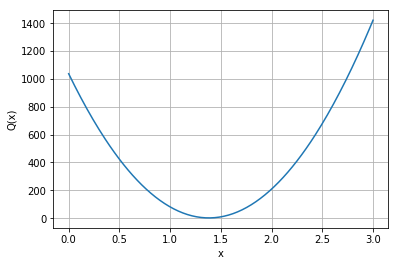

In [67]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

x = np.linspace(0, 3, 201)
plt.plot(x, Q(x, 10 * x - 14, 21 * x -29))
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.grid(True)
plt.show()

#### Задание 6
Найдите одно из псевдорешений вырожденной системы:
Попробуйте также отыскать и нормальное псевдорешение

In [68]:
A = np.array([ [1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]])
np.linalg.det(A)

6.66133814775094e-16

In [69]:
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
print(Q)
print(R)
print(np.dot(Q, R))

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[ -8.1240384   -9.6011363  -11.07823419]
 [  0.           0.90453403   1.80906807]
 [  0.           0.           0.        ]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [70]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [71]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  1.33226763e-15])

In [72]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 1.47287728e-15])

In [73]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 1.47287728e-15 0.00000000e+00]


1.499999999999999

In [74]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915883

In [75]:
np.linalg.lstsq(A, B)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 1.47280825e-16]))

In [76]:
X = np.array([1.25, 0.5, -0.25])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)  

(1.3693063937629153, 1.224744871391589)